#### Importando librerias necesarias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dateutil.relativedelta import relativedelta


In [2]:
data = pd.read_csv('D:\Repositorios Github\codigofacilito\Pandas_ventas_sais_18-22.csv', sep=';', encoding='latin')
data


,Referencia,Descripción,Fecha,Salidas,Precio,"Pedido de venta -> Serie, ejercicio y nº pedido",Pedido de venta -> Nº pedido,Factura de venta -> Serie de factura emitida,Cliente,Cliente -> Nombre fiscal
0,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,17-Ene-2018,1.0,127.6400,01/03-N/18-00296,296.0,1.0,58291,SPANRED S.L.U.
1,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,5-Mar-2018,1.0,104.0000,01/03-N/18-01235,1235.0,1.0,15423,"BELSATI SISTEMAS, S.L."
2,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,7-Mar-2018,1.0,104.4300,01/04-M/18-00166,166.0,18.0,48078,GRUPO ELECTRO STOCKS S.L.U
3,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,12-Mar-2018,1.0,104.4300,01/04-M/18-00180,180.0,18.0,28786,COMPONENTES INFORMATICOS ASTURIAS S.L.
4,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,19-Mar-2018,1.0,86.0000,01/04-N/18-00009,9.0,1.0,58281,GESTSAI INGENIERIA SL
...,...,...,...,...,...,...,...,...,...,...
12878,PH 8032,Banco para Baterías (x12 baterias de 12V-9Ah) ...,25-Oct-2021,1.0,377.5600,01/04-M/21-00930,930.0,18.0,48078,GRUPO ELECTRO STOCKS S.L.U
12879,PH 8032,Banco para Baterías solo carcasa (x12 baterias...,26-Jul-2022,2.0,195.0000,01/08-N/22-02988,2988.0,1.0,65615,GIGATEK 2020 CONSULTORIA SLL
12880,PH 8032,Banco para Baterías solo carcasa (x12 baterias...,8-Ago-2022,3.0,188.2000,01/04-M/22-00627,627.0,18.0,48078,GRUPO ELECTRO STOCKS S.L.U
12881,PH 8030-RA+,"S.A.I. Phasak Conqueror Recondicionado ""Grado ...",29-Ago-2022,1.0,249.3000,01/09-PM/22-01462,1462.0,NaN,66756,CLIENTE FACTURA SIMPLIFICADA PC COMPONENTES


In [3]:
data.dtypes

Referencia                                          object
Descripción                                         object
Fecha                                               object
Salidas                                            float64
Precio                                              object
Pedido de venta -> Serie, ejercicio y nº pedido     object
Pedido de venta -> Nº pedido                       float64
Factura de venta -> Serie de factura emitida       float64
Cliente                                             object
Cliente -> Nombre fiscal                            object
dtype: object

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12883 entries, 0 to 12882
Data columns (total 10 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Referencia                                       12883 non-null  object 
 1   Descripción                                      12874 non-null  object 
 2   Fecha                                            12873 non-null  object 
 3   Salidas                                          12873 non-null  float64
 4   Precio                                           12873 non-null  object 
 5   Pedido de venta -> Serie, ejercicio y nº pedido  12779 non-null  object 
 6   Pedido de venta -> Nº pedido                     12779 non-null  float64
 7   Factura de venta -> Serie de factura emitida     12519 non-null  float64
 8   Cliente                                          12873 non-null  object 
 9   Cliente -> Nombre fiscal    

In [5]:
data.columns

Index(['Referencia', 'Descripción', 'Fecha', 'Salidas', 'Precio',
       'Pedido de venta -> Serie, ejercicio y nº pedido',
       'Pedido de venta -> Nº pedido',
       'Factura de venta -> Serie de factura emitida', 'Cliente',
       'Cliente -> Nombre fiscal'],
      dtype='object')

#### Aqui cambiamos el nombre a las columnas

In [6]:
data.rename(columns={'Cliente -> Nombre fiscal': 'nombre_cliente', 
                     'Pedido de venta -> Nº pedido': 'num_pedido', 
                     'Pedido de venta -> Serie, ejercicio y nº pedido': 'pedido',
                     'Factura de venta -> Serie de factura emitida': 'serie_factura',
                    }, inplace=True)
data.head()

,Referencia,Descripción,Fecha,Salidas,Precio,pedido,num_pedido,serie_factura,Cliente,nombre_cliente
0,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,17-Ene-2018,1.0,127.6400,01/03-N/18-00296,296.0,1.0,58291,SPANRED S.L.U.
1,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,5-Mar-2018,1.0,104.0000,01/03-N/18-01235,1235.0,1.0,15423,"BELSATI SISTEMAS, S.L."
2,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,7-Mar-2018,1.0,104.4300,01/04-M/18-00166,166.0,18.0,48078,GRUPO ELECTRO STOCKS S.L.U
3,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,12-Mar-2018,1.0,104.4300,01/04-M/18-00180,180.0,18.0,28786,COMPONENTES INFORMATICOS ASTURIAS S.L.
4,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,19-Mar-2018,1.0,86.0000,01/04-N/18-00009,9.0,1.0,58281,GESTSAI INGENIERIA SL


In [7]:
data.head()

,Referencia,Descripción,Fecha,Salidas,Precio,pedido,num_pedido,serie_factura,Cliente,nombre_cliente
0,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,17-Ene-2018,1.0,127.6400,01/03-N/18-00296,296.0,1.0,58291,SPANRED S.L.U.
1,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,5-Mar-2018,1.0,104.0000,01/03-N/18-01235,1235.0,1.0,15423,"BELSATI SISTEMAS, S.L."
2,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,7-Mar-2018,1.0,104.4300,01/04-M/18-00166,166.0,18.0,48078,GRUPO ELECTRO STOCKS S.L.U
3,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,12-Mar-2018,1.0,104.4300,01/04-M/18-00180,180.0,18.0,28786,COMPONENTES INFORMATICOS ASTURIAS S.L.
4,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,19-Mar-2018,1.0,86.0000,01/04-N/18-00009,9.0,1.0,58281,GESTSAI INGENIERIA SL


In [8]:
data.rename(columns={'Descripción': 'descripcion',
                     'Referencia': 'referencia',
                     'Fecha': 'fecha',
                     'Salidas': 'salidas', 
                     'Precio': 'precio',
                     'Cliente': 'cliente'}, inplace=True)

In [9]:
data.isnull().any()

referencia        False
descripcion        True
fecha              True
salidas            True
precio             True
pedido             True
num_pedido         True
serie_factura      True
cliente            True
nombre_cliente     True
dtype: bool

In [10]:
# Sumamos todos los datos nulos por columna y mostramos
pedidos_missing = data.isnull().sum()
pedidos_missing

referencia          0
descripcion         9
fecha              10
salidas            10
precio             10
pedido            104
num_pedido        104
serie_factura     364
cliente            10
nombre_cliente     11
dtype: int64

In [11]:
#importamos libreria para manejar fechas
from dateutil.relativedelta import relativedelta

In [12]:
#Aqui quitamos todos los nulos del dataframe y lo guardamos.
df = data.dropna()

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12517 entries, 0 to 12882
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   referencia      12517 non-null  object        
 1   descripcion     12517 non-null  object        
 2   fecha           12517 non-null  datetime64[ns]
 3   salidas         12517 non-null  int64         
 4   precio          12517 non-null  float64       
 5   pedido          12517 non-null  object        
 6   num_pedido      12517 non-null  int64         
 7   serie_factura   12517 non-null  int64         
 8   cliente         12517 non-null  int64         
 9   nombre_cliente  12517 non-null  object        
 10  mes             12517 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.1+ MB


#### En las siguientes lineas asignamos los tipos correctos de datos a cada columna

In [14]:
df["num_pedido"]= df["num_pedido"].astype('int64')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\3988072517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_pedido"]= df["num_pedido"].astype('int64')


In [15]:
df["salidas"]= df["salidas"].astype('int64')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\1431132011.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["salidas"]= df["salidas"].astype('int64')


In [16]:
df["precio"]= df["precio"].astype('float64')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\2870409620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["precio"]= df["precio"].astype('float64')


In [17]:
df["num_pedido"]= df["num_pedido"].astype('int64')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\3988072517.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["num_pedido"]= df["num_pedido"].astype('int64')


In [18]:
df["serie_factura"]= df["serie_factura"].astype('int64')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\3351570582.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["serie_factura"]= df["serie_factura"].astype('int64')


In [19]:
df["cliente"]= df["cliente"].astype('int64')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\3264482647.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["cliente"]= df["cliente"].astype('int64')


In [20]:
df.head(10)

,referencia,descripcion,fecha,salidas,precio,pedido,num_pedido,serie_factura,cliente,nombre_cliente
0,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,17-Ene-2018,1,127.64,01/03-N/18-00296,296,1,58291,SPANRED S.L.U.
1,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,5-Mar-2018,1,104.00,01/03-N/18-01235,1235,1,15423,"BELSATI SISTEMAS, S.L."
2,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,7-Mar-2018,1,104.43,01/04-M/18-00166,166,18,48078,GRUPO ELECTRO STOCKS S.L.U
3,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,12-Mar-2018,1,104.43,01/04-M/18-00180,180,18,28786,COMPONENTES INFORMATICOS ASTURIAS S.L.
4,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,19-Mar-2018,1,86.00,01/04-N/18-00009,9,1,58281,GESTSAI INGENIERIA SL
5,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,26-Mar-2018,2,127.64,01/03-N/18-01613,1613,1,59299,"SHOTIS SERVICIOS TECNOLÓGICOS, S.L."
6,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,4-Abr-2018,1,112.00,01/03-N/18-01742,1742,1,58291,SPANRED S.L.U.
7,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,16-Abr-2018,2,127.64,01/03-N/18-01971,1971,1,49617,TELPLAY S.L.
8,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,20-Abr-2018,1,104.43,01/04-M/18-00290,290,18,48078,GRUPO ELECTRO STOCKS S.L.U
9,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,24-May-2018,1,104.43,01/04-M/18-00385,385,18,48078,GRUPO ELECTRO STOCKS S.L.U


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12517 entries, 0 to 12882
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   referencia      12517 non-null  object        
 1   descripcion     12517 non-null  object        
 2   fecha           12517 non-null  datetime64[ns]
 3   salidas         12517 non-null  int64         
 4   precio          12517 non-null  float64       
 5   pedido          12517 non-null  object        
 6   num_pedido      12517 non-null  int64         
 7   serie_factura   12517 non-null  int64         
 8   cliente         12517 non-null  int64         
 9   nombre_cliente  12517 non-null  object        
 10  mes             12517 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.1+ MB


In [22]:
df.head(20)

,referencia,descripcion,fecha,salidas,precio,pedido,num_pedido,serie_factura,cliente,nombre_cliente
0,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,17-Ene-2018,1,127.64,01/03-N/18-00296,296,1,58291,SPANRED S.L.U.
1,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,5-Mar-2018,1,104.00,01/03-N/18-01235,1235,1,15423,"BELSATI SISTEMAS, S.L."
2,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,7-Mar-2018,1,104.43,01/04-M/18-00166,166,18,48078,GRUPO ELECTRO STOCKS S.L.U
3,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,12-Mar-2018,1,104.43,01/04-M/18-00180,180,18,28786,COMPONENTES INFORMATICOS ASTURIAS S.L.
4,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,19-Mar-2018,1,86.00,01/04-N/18-00009,9,1,58281,GESTSAI INGENIERIA SL
5,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,26-Mar-2018,2,127.64,01/03-N/18-01613,1613,1,59299,"SHOTIS SERVICIOS TECNOLÓGICOS, S.L."
6,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,4-Abr-2018,1,112.00,01/03-N/18-01742,1742,1,58291,SPANRED S.L.U.
7,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,16-Abr-2018,2,127.64,01/03-N/18-01971,1971,1,49617,TELPLAY S.L.
8,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,20-Abr-2018,1,104.43,01/04-M/18-00290,290,18,48078,GRUPO ELECTRO STOCKS S.L.U
9,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,24-May-2018,1,104.43,01/04-M/18-00385,385,18,48078,GRUPO ELECTRO STOCKS S.L.U


### Me estaba dando un error con las fechas y es porque el formato 18 - Ene - 2021 esta en espanol y tiene que ser en Ingles 18 - Jan - 2021. Asi que cambiamos los nombres.

In [23]:
df['fecha'] = df['fecha'].str.replace('Ene','Jan')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\1563049663.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = df['fecha'].str.replace('Ene','Jan')


In [24]:
df['fecha'] = df['fecha'].str.replace('Abr','Apr')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\3487459887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = df['fecha'].str.replace('Abr','Apr')


In [25]:
df['fecha'] = df['fecha'].str.replace('Ago','Aug')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\2159912137.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = df['fecha'].str.replace('Ago','Aug')


In [26]:
df['fecha'] = df['fecha'].str.replace('Dic','Dec')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\1678617602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = df['fecha'].str.replace('Dic','Dec')


In [27]:
# Aqui aplicamos el formato fecha a la columna fecha y ahora si lo coge
df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%b-%Y')

C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\2264925295.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['fecha'] = pd.to_datetime(df['fecha'], format='%d-%b-%Y')


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12517 entries, 0 to 12882
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   referencia      12517 non-null  object        
 1   descripcion     12517 non-null  object        
 2   fecha           12517 non-null  datetime64[ns]
 3   salidas         12517 non-null  int64         
 4   precio          12517 non-null  float64       
 5   pedido          12517 non-null  object        
 6   num_pedido      12517 non-null  int64         
 7   serie_factura   12517 non-null  int64         
 8   cliente         12517 non-null  int64         
 9   nombre_cliente  12517 non-null  object        
 10  mes             12517 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(4)
memory usage: 1.1+ MB


In [29]:
df.head(10)

,referencia,descripcion,fecha,salidas,precio,pedido,num_pedido,serie_factura,cliente,nombre_cliente
0,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-01-17,1,127.64,01/03-N/18-00296,296,1,58291,SPANRED S.L.U.
1,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-03-05,1,104.00,01/03-N/18-01235,1235,1,15423,"BELSATI SISTEMAS, S.L."
2,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-03-07,1,104.43,01/04-M/18-00166,166,18,48078,GRUPO ELECTRO STOCKS S.L.U
3,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-03-12,1,104.43,01/04-M/18-00180,180,18,28786,COMPONENTES INFORMATICOS ASTURIAS S.L.
4,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-03-19,1,86.00,01/04-N/18-00009,9,1,58281,GESTSAI INGENIERIA SL
5,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-03-26,2,127.64,01/03-N/18-01613,1613,1,59299,"SHOTIS SERVICIOS TECNOLÓGICOS, S.L."
6,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-04-04,1,112.00,01/03-N/18-01742,1742,1,58291,SPANRED S.L.U.
7,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-04-16,2,127.64,01/03-N/18-01971,1971,1,49617,TELPLAY S.L.
8,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-04-20,1,104.43,01/04-M/18-00290,290,18,48078,GRUPO ELECTRO STOCKS S.L.U
9,PH 9100,Modulo SNMP para S.A.I. Phasak con Intelligent...,2018-05-24,1,104.43,01/04-M/18-00385,385,18,48078,GRUPO ELECTRO STOCKS S.L.U


Crear una nueva columna que contenga la fecha de fin del período de previsión, que será la fecha actual más 6 meses

In [30]:
# Agrupar los datos por referencia y calcular el total de ventas por referencia
ventas_referencia = df.groupby('referencia')['salidas'].sum()

In [31]:
ventas_referencia.head()

referencia
PH 7210        1020
PH 7266        6070
PH 7288        3494
PH 7312        1475
PH 7312-RA+       1
Name: salidas, dtype: int64

In [32]:
# Calcular la media móvil de las ventas por referencia en los últimos 4 años
ventas_referencia_movil = ventas_referencia.rolling(4).mean()

In [33]:
ventas_referencia_movil.head()

referencia
PH 7210            NaN
PH 7266            NaN
PH 7288            NaN
PH 7312        3014.75
PH 7312-RA+    2760.00
Name: salidas, dtype: float64

In [34]:
# Calcular la previsión de ventas para los próximos 6 meses
prevision_ventas = pd.concat([ventas_referencia_movil, pd.Series([ventas_referencia_movil[-1]] * 6, index=range(len(ventas_referencia_movil), len(ventas_referencia_movil)+6))])


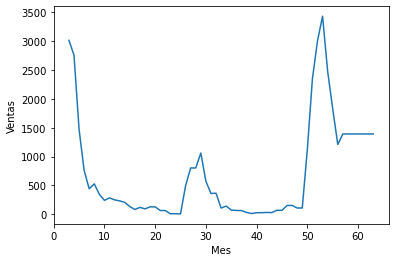

In [35]:
# Visualizar la previsión de ventas
plt.plot(range(len(prevision_ventas)), prevision_ventas)
plt.xlabel('Mes')
plt.ylabel('Ventas')
plt.show()



In [36]:
# Crear una columna con el mes de cada venta
df['mes'] = pd.to_datetime(df['fecha']).dt.month


C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\690200314.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['mes'] = pd.to_datetime(df['fecha']).dt.month


In [37]:
# Crear una columna con el mes de cada venta
df.loc[:, 'mes'] = pd.to_datetime(df['fecha']).dt.month


C:\Users\carlo\AppData\Local\Temp\ipykernel_19024\4192820915.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.loc[:, 'mes'] = pd.to_datetime(df['fecha']).dt.month


In [38]:
# Agrupar los datos por mes y referencia y calcular el total de ventas por mes y referencia
ventas_mes_referencia = df.groupby(['mes', 'referencia'])['salidas'].sum()


In [39]:
ventas_mes_referencia

mes  referencia
1    PH 7210       109
     PH 7266       358
     PH 7288       388
     PH 7312        98
     PH 7315        92
                  ... 
12   PH 9420       115
     PH 9464       134
     PH 9465       282
     PH 9478         1
     PH 9485       196
Name: salidas, Length: 511, dtype: int64

In [40]:
# Calcular la media móvil de las ventas por mes y referencia en los últimos 4 años
ventas_mes_referencia_movil = ventas_mes_referencia.rolling(window=4).mean()


In [41]:
# Agrupar la media móvil de las ventas por referencia y seleccionar el último valor de la serie de ventas para cada referencia
ventas_referencia_movil = ventas_mes_referencia_movil.groupby('referencia').tail(1)

In [42]:
# Para cada referencia, calcular la previsión de ventas para los próximos 6 meses
prevision_ventas = pd.concat([ventas_referencia_movil] * 6, ignore_index=True)

Text(0, 0.5, 'Ventas')

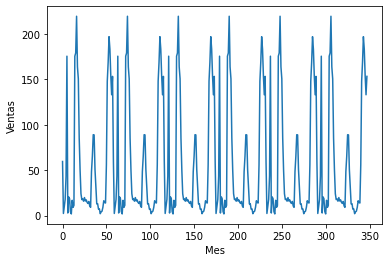

In [43]:
# Importar matplotlib
import matplotlib.pyplot as plt

# Visualizar la previsión de ventas
plt.plot(prevision_ventas)
plt.xlabel('Mes')
plt.ylabel('Ventas')


In [44]:
prevision_ventas

0       59.50
1        2.25
2        9.75
3       17.75
4       43.50
        ...  
343    197.00
344    183.25
345    154.00
346    133.00
347    153.25
Name: salidas, Length: 348, dtype: float64

In [45]:
ventas_referencia_movil

mes  referencia 
5    PH 9222         59.50
     PH 9312          2.25
     PH 9332          9.75
6    PH 9200         17.75
8    PH 9262         43.50
9    PH 7312-RA+    175.50
     PH 9294          2.75
10   PH 8032         20.50
     PH 9101         18.50
     PH 9103          4.25
     PH 9205          1.75
11   PH 8022         16.75
     PH 9274          9.00
     PH 9322         11.25
12   PH 7210        175.50
     PH 7266        179.00
     PH 7288        219.50
     PH 7312        163.75
     PH 7315        150.50
     PH 7322         85.25
     PH 7512         50.00
     PH 7521         24.00
     PH 7530         17.50
     PH 7610         18.25
     PH 7621         15.75
     PH 7631         19.75
     PH 7690         16.00
     PH 8010         17.25
     PH 8020         14.50
     PH 8030         13.25
     PH 9100         15.50
     PH 9102         10.50
     PH 9106          9.00
     PH 9210         48.25
     PH 9220         65.25
     PH 9230         89.00
     PH 923

In [46]:
# Exportar el DataFrame limpio a un fichero csv con separacion de comas
df.to_csv('/home/ubuntu/projects/codigofacilito/sais_definitivo.csv', sep=';')

OSError: Cannot save file into a non-existent directory: '\home\ubuntu\projects\codigofacilito'

In [ ]:
import pandas as pd

dataframe=pd.DataFrame({'Attendance': {0: 60, 1: 100, 2: 80,3: 78,4: 95},
                        'Obtained Marks': {0: 90, 1: 75, 2: 82, 3: 64, 4: 45}})
print("The Original Data frame is: \n")
print(dataframe)

dataframe1 = dataframe.rolling(3).sum()
print("The Rolling Window After Calculation is: \n")
print(dataframe1)


In [ ]:
import numpy as np
import pandas as pd

#make this example reproducible
np.random.seed(0)

#create dataset
period = np.arange(1, 101, 1)
leads = np.random.uniform(1, 20, 100)
sales = 60 + 2*period + np.random.normal(loc=0, scale=.5*period, size=100)
df = pd.DataFrame({'period': period, 'leads': leads, 'sales': sales})

#view first 10 rows
df.head(10)